## 回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = axによる近似

In [2]:
def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a

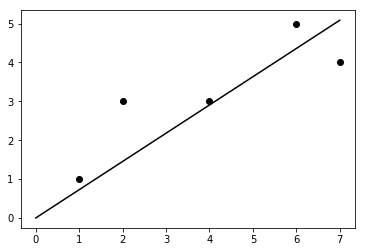

In [3]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
a = reg1dim1(x, y)

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color='k')

y = ax + b による近似

In [4]:
def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() / n) /
            ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

0.5 1.2


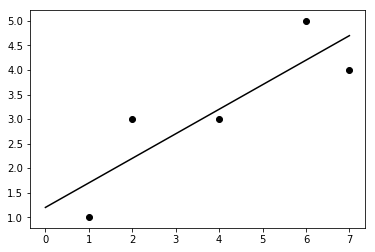

In [6]:
a,  b = reg1dim2(x, y)
print(a, b)
plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [b, a*xmax + b], color='k')

### 特徴ベクトルが多次元の場合への拡張

In [7]:
from scipy import linalg

In [8]:
class LinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [9]:
from mpl_toolkits.mplot3d import axes3d

In [10]:
n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)
print("係数：", model.w_)
print(model.predict(np.array([1, 1])))

係数： [1.11450326 1.95737004 3.00295751]
[6.07483081]


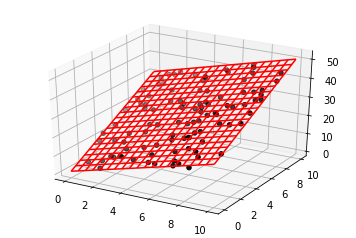

In [11]:
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                                                  np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() +
                model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')

In [12]:
import csv

In [13]:
# データ読み込み
Xy = []
with open("../data/wine-quality/winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
        
Xy = np.array(Xy[1:], dtype=np.float64)

In [14]:
Xy.shape

(1599, 12)

In [15]:
Xy[:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 5.000e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 5.000e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00, 6.000e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00]])

In [17]:
# 訓練用データとテスト用データに分割する
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:1000, :-1]
train_y =  Xy[:1000, -1]
test_X = Xy[1000:, :-1]
test_y =  Xy[1000:, -1]
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1000, 11)
(1000,)
(599, 11)
(599,)


In [18]:
model = LinearRegression()
model.fit(train_X, train_y)

In [19]:
y = model.predict(test_X)

# 最初の５つの正解と予測値
for i in range(5):
    print("{:1.0f} {:5.3f}".format(test_y[i], y[i]))

6 6.659
7 5.969
5 5.563
5 4.285
5 5.221


In [20]:
rmse = np.sqrt(((test_y - y)**2).mean())
print("RMSE:", rmse)

RMSE: 0.6880965591634258


### リッジ回帰

In [21]:
from scipy import linalg

In [24]:
class RidgeRegression:
    def __init__(self, lambda_=1.):
        self.lambda_ =lambda_
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        c = np.eye(Xtil.shape[1])
        A = np.dot(Xtil.T, Xtil) + self.lambda_ * c
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

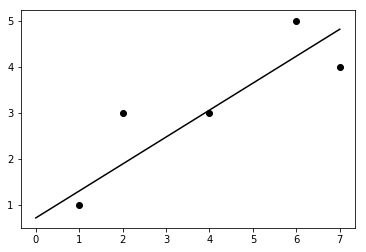

In [25]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
model = RidgeRegression()
model.fit(x, y)
b, a = model.w_

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax],[b, b + a*xmax], color='k')

係数： [1.06545621 1.96200961 3.00594504]
[6.03341087]


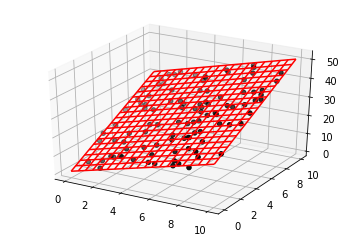

In [26]:
n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = RidgeRegression()
model.fit(X, y)
print("係数：", model.w_)
print(model.predict(np.array([1, 1])))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                                                  np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() +
                model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')

### ラッソ回帰

In [27]:
def soft_thresholding(x, y):
    return np.sign(x) * max(abs(x) - y, 0)

In [28]:
class Lasso:
    def __init__(self, lambda_, tol=0.0001, max_iter=1000):
        self.lambda_ = lambda_
        self.tol = tol
        self.max_iter = max_iter
        self.w_ = None
        
    def fit(self, X, t):
        n, d = X.shape
        self.w_ = np.zeros(d + 1)
        avgl1 = 0.
        for _ in range(self.max_iter):
            avgl1_prev = avgl1
            self._update(n, d, X, t)
            avgl1 = np.abs(self.w_).sum() / self.w_.shape[0]
            if abs(avgl1 - avgl1_prev) <= self.tol:
                break
                
    def _update(self, n, d, X, t):
        self.w_[0] = (t - np.dot(X, self.w_[1:])).sum() / n
        w0vec = np.ones(n) * self.w_[0]
        for k in range(d):
            ww = self.w_[1:]
            ww[k] = 0
            q = np.dot(t - w0vec - np.dot(X, ww), X[:, k])
            r = np.dot(X[:, k], X[:, k])
            self.w_[k + 1] = soft_thresholding(q / r, self.lambda_)
            
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(X.shape[0], -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [29]:
# 訓練用データとテスト用データに分割する
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:1000, :-1]
train_y =  Xy[:1000, -1]
test_X = Xy[1000:, :-1]
test_y =  Xy[1000:, -1]
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1000, 11)
(1000,)
(599, 11)
(599,)


In [32]:
# ハイパーパラメータを変えながら学習させて結果を表示
for lambda_ in [10, 1., 0.1, 0.01]:
    model = Lasso(lambda_)
    model.fit(train_X, train_y)
    
    y = model.predict(test_X)
    print("--- lambda = {} ---".format(lambda_))
    print("coefficients:")
    print(model.w_)
    mse = ((y - test_y).sum()**2).mean()
    print("MSE: {:.3f}".format(mse))

--- lambda = 10 ---
coefficients:
[ 5.631  0.    -0.     0.     0.    -0.    -0.    -0.    -0.    -0.
  0.     0.   ]
MSE: 64.497
--- lambda = 1.0 ---
coefficients:
[ 5.631  0.    -0.     0.     0.    -0.    -0.    -0.    -0.    -0.
  0.     0.   ]
MSE: 64.497
--- lambda = 0.1 ---
coefficients:
[ 5.93044423  0.         -0.46126262  0.47359556  0.         -2.1414945
 -0.         -0.          0.          0.          0.          0.        ]
MSE: 152.916
--- lambda = 0.01 ---
coefficients:
[ 5.85085216  0.         -1.22901433  0.15012573  0.         -3.51296493
 -0.         -0.         -0.          0.          1.04581002  0.        ]
MSE: 346.848
